<a href="https://colab.research.google.com/github/anthonyrueckert/newrepo/blob/main/VOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/01-Fantasy%20Pros%20Projections%20-%20(2022.08.25).csv')
df.head()

,Player,Team,Pos,RushingAtt,RushingYds,RushingTD,Receptions,ReceivingYds,ReceivingTD,FL,...,Int,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,YardsAgainst,FieldGoalsMade,FieldGoalsAttempted,ExtraPointsMade
0,Jonathan Taylor,IND,RB,325.4,1600.1,14.8,42.5,354.3,2.0,2.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Derrick Henry,TEN,RB,366.2,1640.1,13.0,27.4,216.0,0.9,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Austin Ekeler,LAC,RB,221.1,984.0,9.4,74.5,665.0,5.3,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Christian McCaffrey,CAR,RB,237.4,1057.4,7.6,88.9,757.9,4.1,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Joe Mixon,CIN,RB,287.4,1204.2,9.8,47.1,341.9,2.6,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns.tolist()
', '.join(df.columns)

'Player, Team, Pos, RushingAtt, RushingYds, RushingTD, Receptions, ReceivingYds, ReceivingTD, FL, PassingAtt, PassingCmp, PassingYds, PassingTD, TotalInt, TotalSacks, Int, FumblesRecovered, FumblesForced, DefensiveTDs, SafetysForced, PointsAllowed, YardsAgainst, FieldGoalsMade, FieldGoalsAttempted, ExtraPointsMade'

In [ ]:
scoring_weights = {
    'receptions' :1,
    'receiving_yds': .1,
    'receiving_tds': 6,
    'FL': -2,
    'rush_yds': .1,
    'rush_tds': 6,
    'pass_yds': .04,
    'pass_td': 4,
    'int': -2
}

df['FantasyPoints'] = (
    df['Receptions']*scoring_weights['receptions']+ df['ReceivingYds']*scoring_weights['receiving_yds'] + df['ReceivingTD']*scoring_weights['receiving_tds'] + \
    df['FL']*scoring_weights['FL']+ df['RushingYds']*scoring_weights['rush_yds']+ df['RushingTD']*scoring_weights['rush_tds'] + \
    df['Int']*scoring_weights['int']+ df['PassingYds']*scoring_weights['pass_yds']+ df['PassingTD']*scoring_weights['pass_td']
)


In [ ]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2022/06-Data%20Munging/02-ADP%20(PPR)%20-%20(2022.08.23).csv')
adp_df.head()

adp_df['ADP RANK'] = adp_df['AVG'].rank()
adp_df.head()

,Rank,Player,Team,Pos,ESPN,Fantrax,Sleeper,AVG,ADP RANK
0,1,Jonathan Taylor,IND,RB,1.0,1.0,1.0,1.0,1.0
1,2,Christian McCaffrey,CAR,RB,2.0,4.0,2.0,3.0,2.5
2,3,Austin Ekeler,LAC,RB,4.0,2.0,4.0,3.0,2.5
3,4,Cooper Kupp,LAR,WR,3.0,3.0,5.0,4.2,4.0
4,5,Derrick Henry,TEN,RB,5.0,6.0,3.0,4.8,5.0


In [ ]:
adp_df.shape
adp_df_cutoff = adp_df[:100]
adp_df_cutoff.shape

(100, 9)

In [ ]:
replacement_player = {
    'QB': '',
    'RB': '',
    'WR': '',
    'TE': ''
}

for _, row in adp_df_cutoff.iterrows():
  position = row['Pos']
  player = row['Player']

  if position in replacement_player:
      replacement_player[position] = player

In [ ]:
replacement_player
df = df[['Player','Pos','Team','FantasyPoints']]

df.head()

,Player,Pos,Team,FantasyPoints
0,Jonathan Taylor,RB,IND,334.14
1,Derrick Henry,RB,TEN,292.41
2,Austin Ekeler,RB,LAC,324.60
3,Christian McCaffrey,RB,CAR,337.83
4,Joe Mixon,RB,CIN,272.91


In [ ]:
replacement_values = {}

for position, player_name in replacement_player.items():
  player = df.loc[df['Player'] == player_name]
  replacement_values[position] = player['FantasyPoints'].tolist()[0]

replacement_values

{'QB': 328.066, 'RB': 118.25, 'WR': 200.22, 'TE': 145.09000000000003}

In [ ]:
pd.set_option('chained_assignment', None)
df = df.loc[df['Pos'].isin(['QB','RB','WR','TE'])]
df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis = 1
)


In [ ]:
pd.set_option('display.max_rows', None)
df.sort_values(by='VOR',ascending = False).head()

,Player,Pos,Team,FantasyPoints,VOR
3,Christian McCaffrey,RB,CAR,337.83,219.58
0,Jonathan Taylor,RB,IND,334.14,215.89
2,Austin Ekeler,RB,LAC,324.60,206.35
1,Derrick Henry,RB,TEN,292.41,174.16
6,Alvin Kamara,RB,NO,279.54,161.29


In [ ]:
df['VOR Rank'] = df['VOR'].rank(ascending = False)
df.sort_values(by='VOR Rank')

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
3,Christian McCaffrey,RB,CAR,337.830,219.580,1.0
0,Jonathan Taylor,RB,IND,334.140,215.890,2.0
2,Austin Ekeler,RB,LAC,324.600,206.350,3.0
1,Derrick Henry,RB,TEN,292.410,174.160,4.0
6,Alvin Kamara,RB,NO,279.540,161.290,5.0
170,Cooper Kupp,WR,LAR,359.160,158.940,6.0
7,Najee Harris,RB,PIT,274.340,156.090,7.0
4,Joe Mixon,RB,CIN,272.910,154.660,8.0
5,Dalvin Cook,RB,MIN,265.290,147.040,9.0
8,Leonard Fournette,RB,TB,263.500,145.250,10.0


In [ ]:
df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,92.0,-214.926652,140.651245,-328.066,-319.8085,-312.232,-62.0435,87.208
RB,170.0,-38.695706,86.379125,-118.250,-102.6600,-78.485,6.0300,219.580
TE,142.0,-91.744507,57.018349,-145.090,-130.7500,-115.845,-72.6050,127.060
WR,246.0,-117.704390,83.762582,-200.220,-186.4275,-160.265,-60.5550,158.940


In [ ]:
#min max standardizing
df['VOR minmax'] = df['VOR'].apply(lambda x: (x-df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))
df = df.sort_values(by = 'VOR minmax', ascending = False)
df.head()
df.groupby('Pos')['VOR minmax'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,92.0,0.206592,0.256829,0.000000,0.015078,0.028913,0.485756,0.758289
RB,170.0,0.528389,0.157728,0.383123,0.411591,0.455734,0.610058,1.000000
TE,142.0,0.431522,0.104115,0.334114,0.360298,0.387515,0.466471,0.831059
WR,246.0,0.384120,0.152950,0.233446,0.258631,0.306404,0.488474,0.889272


In [ ]:
df = df.rename({
    'VOR minmax': 'Value',
    'VOR Rank': 'Value Rank'
}, axis = 1)

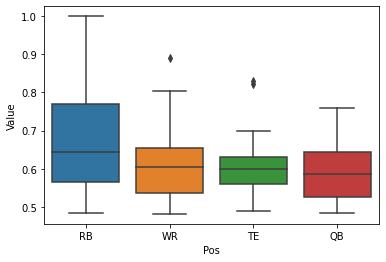

In [ ]:
import seaborn as sns
num_teams = 12
num_spots = 16
df_copy = df[:num_teams*num_spots]

sns.boxplot(x = df_copy['Pos'], y = df_copy['Value']); 

In [ ]:
adp_df = adp_df.rename({
    'AVG': 'Average ADP',
    'ADP RANK': 'ADP Rank'
}, axis = 1)

df = df.merge(adp_df, how = 'left', on = ['Player','Pos','Team'])
df['ADP Value Difference'] = df['ADP Rank'] - df['Value Rank']
df.sort_values(by='ADP Value Difference')

,Player,Pos,Team,FantasyPoints,VOR,Value Rank,Value,Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,ADP Value Difference
574,Deshaun Watson,QB,CLE,128.786,-199.280,575.0,0.235163,174.0,186.0,209.0,173.0,178.2,177.0,-398.0
600,Taysom Hill,QB,NO,19.686,-308.380,601.0,0.035947,225.0,NaN,224.0,220.0,216.5,223.0,-378.0
592,Kenny Pickett,QB,PIT,109.542,-218.524,593.0,0.200023,226.0,205.0,284.0,215.0,234.0,245.0,-348.0
601,Jimmy Garoppolo,QB,SF,17.396,-310.670,602.0,0.031765,272.0,NaN,246.0,NaN,253.3,275.5,-326.5
599,Tyler Huntley,QB,BAL,20.202,-307.864,600.0,0.036889,319.0,NaN,263.0,NaN,263.0,292.0,-308.0
591,Geno Smith,QB,SEA,122.380,-205.686,592.0,0.223466,335.0,NaN,276.0,NaN,276.0,311.5,-280.5
605,Teddy Bridgewater,QB,MIA,13.278,-314.788,606.0,0.024246,351.0,NaN,NaN,NaN,285.0,330.5,-275.5
606,Malik Willis,QB,TEN,13.078,-314.988,607.0,0.023880,359.0,NaN,325.0,NaN,308.0,356.0,-251.0
593,Desmond Ridder,QB,ATL,85.588,-242.478,594.0,0.156283,367.0,NaN,298.0,NaN,298.0,347.5,-246.5
594,Andy Dalton,QB,NO,29.516,-298.550,595.0,0.053896,393.0,NaN,349.0,NaN,349.0,392.5,-202.5


In [ ]:
draft_pool = df.sort_values(by = 'ADP Value Difference')[:196]
draft_pool.head()

,Player,Pos,Team,FantasyPoints,VOR,Value Rank,Value,Rank,ESPN,Fantrax,Sleeper,Average ADP,ADP Rank,ADP Value Difference
574,Deshaun Watson,QB,CLE,128.786,-199.280,575.0,0.235163,174.0,186.0,209.0,173.0,178.2,177.0,-398.0
600,Taysom Hill,QB,NO,19.686,-308.380,601.0,0.035947,225.0,NaN,224.0,220.0,216.5,223.0,-378.0
592,Kenny Pickett,QB,PIT,109.542,-218.524,593.0,0.200023,226.0,205.0,284.0,215.0,234.0,245.0,-348.0
601,Jimmy Garoppolo,QB,SF,17.396,-310.670,602.0,0.031765,272.0,NaN,246.0,NaN,253.3,275.5,-326.5
599,Tyler Huntley,QB,BAL,20.202,-307.864,600.0,0.036889,319.0,NaN,263.0,NaN,263.0,292.0,-308.0
